# Load the data

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

path = "../final_data/player_physical_splits.csv"
df = pd.read_csv(path)
df.head()

,Total Distance,Walking Distance,Jogging Distance,Low Speed Running Distance,High Speed Running Distance,Sprinting Distance,Walking Count,Jogging Count,Low Speed Running Count,High Speed Running Count,Sprinting Count,Minute Splits,player_name,player_id,game_opta_id,team_id,team_name,half
0,632.80,145.77,299.67,168.66,18.70,0.00,26,35,15,3,0,5,Kerstin Casparij,447080.0,2312135,9660.0,Manchester City WFC,1
1,687.34,127.55,321.52,169.71,49.17,19.40,19,33,22,7,1,10,Kerstin Casparij,447080.0,2312135,9660.0,Manchester City WFC,1
2,595.82,169.12,245.98,152.38,26.81,1.54,26,35,16,2,0,15,Kerstin Casparij,447080.0,2312135,9660.0,Manchester City WFC,1
3,525.94,141.85,242.33,101.79,17.70,22.28,25,32,12,2,2,20,Kerstin Casparij,447080.0,2312135,9660.0,Manchester City WFC,1
4,288.63,146.04,83.84,58.75,0.00,0.00,8,12,4,0,0,25,Kerstin Casparij,447080.0,2312135,9660.0,Manchester City WFC,1


# Create a dictionary of which matches each player has played

For example: `'Kerstin Casparij': array([2312135, 2312152, 2312166, 2312183]`

In [31]:
dict = {}
players = df['player_name'].unique()

for i in range(0,len(players)):
    games_by_each_player = df.loc[df['player_name'] == players[i]]['game_opta_id'].unique()
    dict[players[i]] = games_by_each_player


{'Kerstin Casparij': array([2312135, 2312152, 2312166, 2312183], dtype=int64),
 'Ellie Roebuck': array([2312135, 2312152, 2312166, 2312183, 2312213], dtype=int64),
 'Laia Aleixandri': array([2312135, 2312152, 2312166, 2312183, 2312213], dtype=int64),
 'Chloe Kelly': array([2312135, 2312152, 2312166, 2312183, 2312213], dtype=int64),
 'Hayley Raso': array([2312135, 2312152, 2312166, 2312183], dtype=int64),
 'Alex Greenwood': array([2312135, 2312152, 2312166, 2312183, 2312213], dtype=int64),
 'Steph Houghton': array([2312135, 2312152, 2312213], dtype=int64),
 'Lauren Hemp': array([2312135, 2312152, 2312166, 2312213], dtype=int64),
 'Khadija Shaw': array([2312135, 2312152, 2312166, 2312183, 2312213], dtype=int64),
 'Filippa Angeldahl': array([2312135, 2312152, 2312183, 2312213], dtype=int64),
 'Yui Hasegawa': array([2312135, 2312152, 2312166, 2312183, 2312213], dtype=int64),
 'Laura Coombs': array([2312135, 2312152, 2312166, 2312183, 2312213], dtype=int64),
 'Manuela Zinsberger': array([23

## Visualise total distance covered by each player for each match

Kerstin Casparij


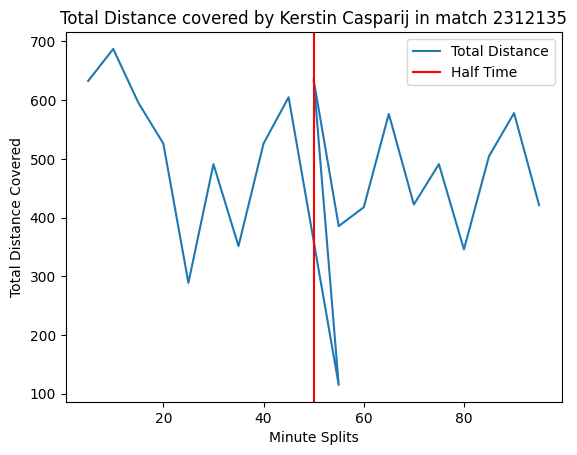

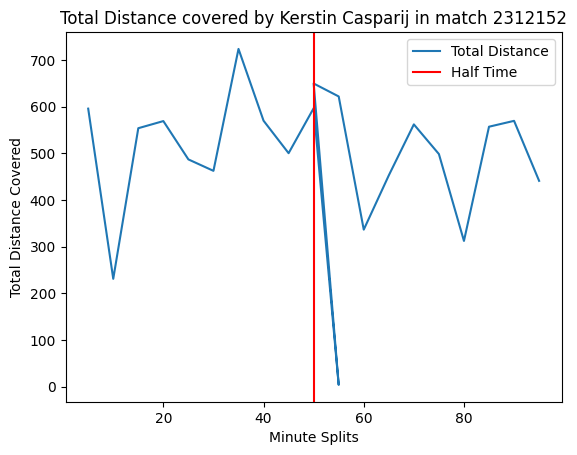

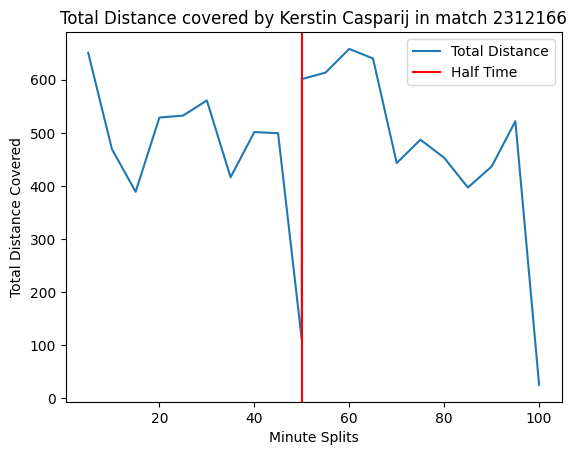

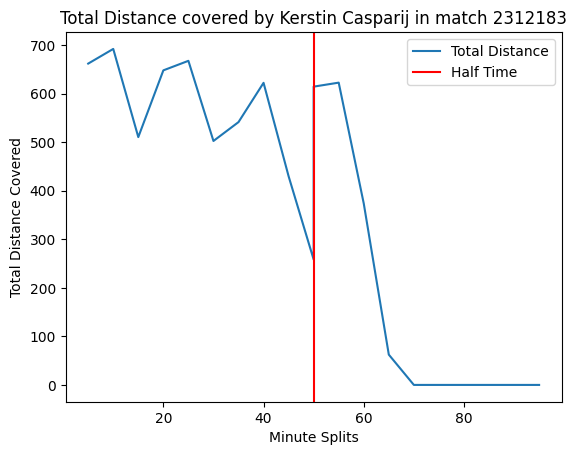

In [73]:
for i in dict:
   print(i)
   for j in dict[i]:
      plt.figure()
      plt.title(f"Total Distance covered by {i} in match {j}")
      plt.plot(
         df.loc[(df['player_name']==i) & (df['game_opta_id'] == j)]['Minute Splits'], 
         df.loc[(df['player_name']==i) & (df['game_opta_id'] == j)]['Total Distance'], 
         label="Total Distance")	
      plt.axvline(x=50,color='red', label="Half Time")
      plt.xlabel('Minute Splits')
      plt.ylabel('Total Distance Covered')
      plt.legend()
      plt.show()
   break





# Create a dictionary of which players are in each match

For example: `2312135: array(['Kerstin Casparij', 'Ellie Roebuck', 'Laia Aleixandri'...`

In [167]:
dict_matches = {}
players = df['game_opta_id'].unique()

for i in range(0,len(players)):
    games_by_each_player = df.loc[df['game_opta_id'] == players[i]]['player_name'].unique()
    dict_matches[players[i]] = games_by_each_player






## Visualise the total distance covered by each player in a match

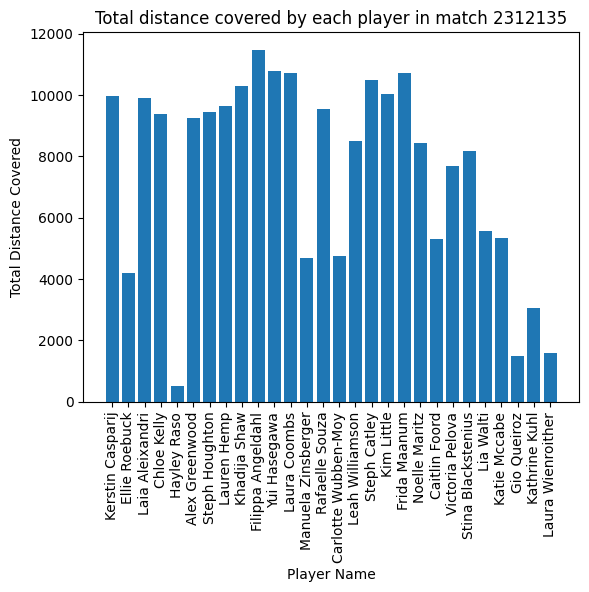

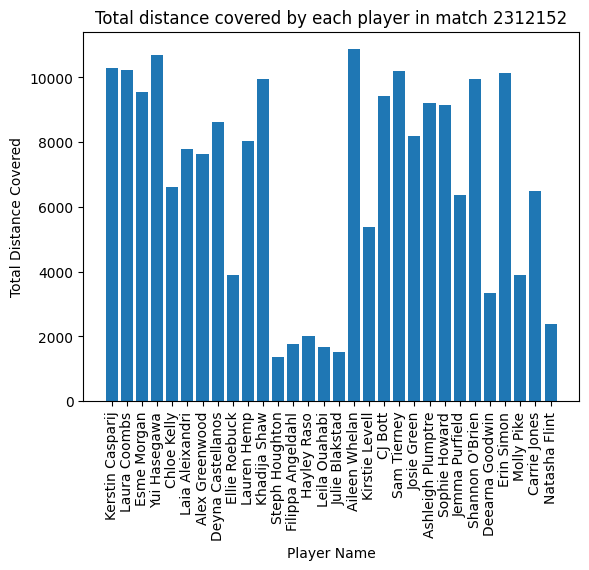

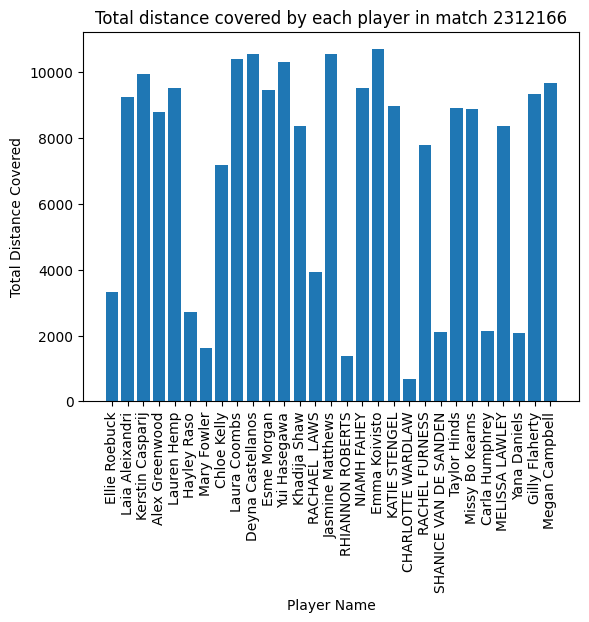

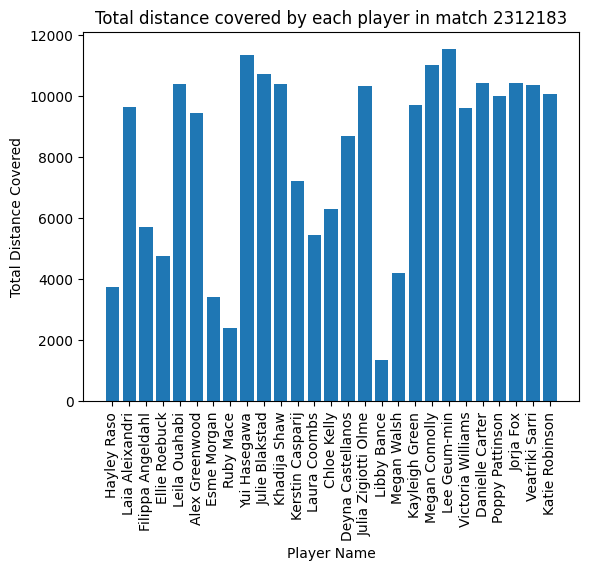

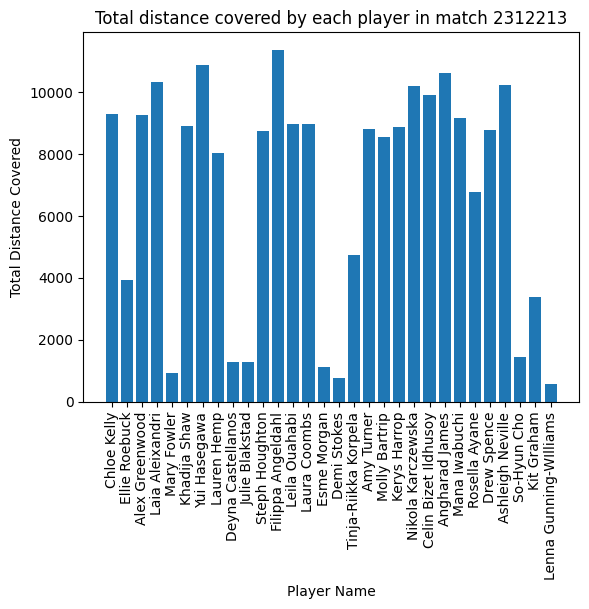

In [109]:
for i in dict_matches:

    total_distances = {}
    for j in dict_matches[i]:
        total_distances[j] = df.loc[(df['player_name']==j) & (df['game_opta_id'] == i)]['Total Distance'].sum()

    plt.figure()
    plt.title(f"Total distance covered by each player in match {i}")
    keys = total_distances.keys()
    values = total_distances.values()
    plt.bar(keys, values)
    plt.xticks(rotation=90)
    plt.xlabel('Player Name')
    plt.ylabel('Total Distance Covered')
    plt.show()


# Visualise all the distances (walking, jogging) covered by each player in each match

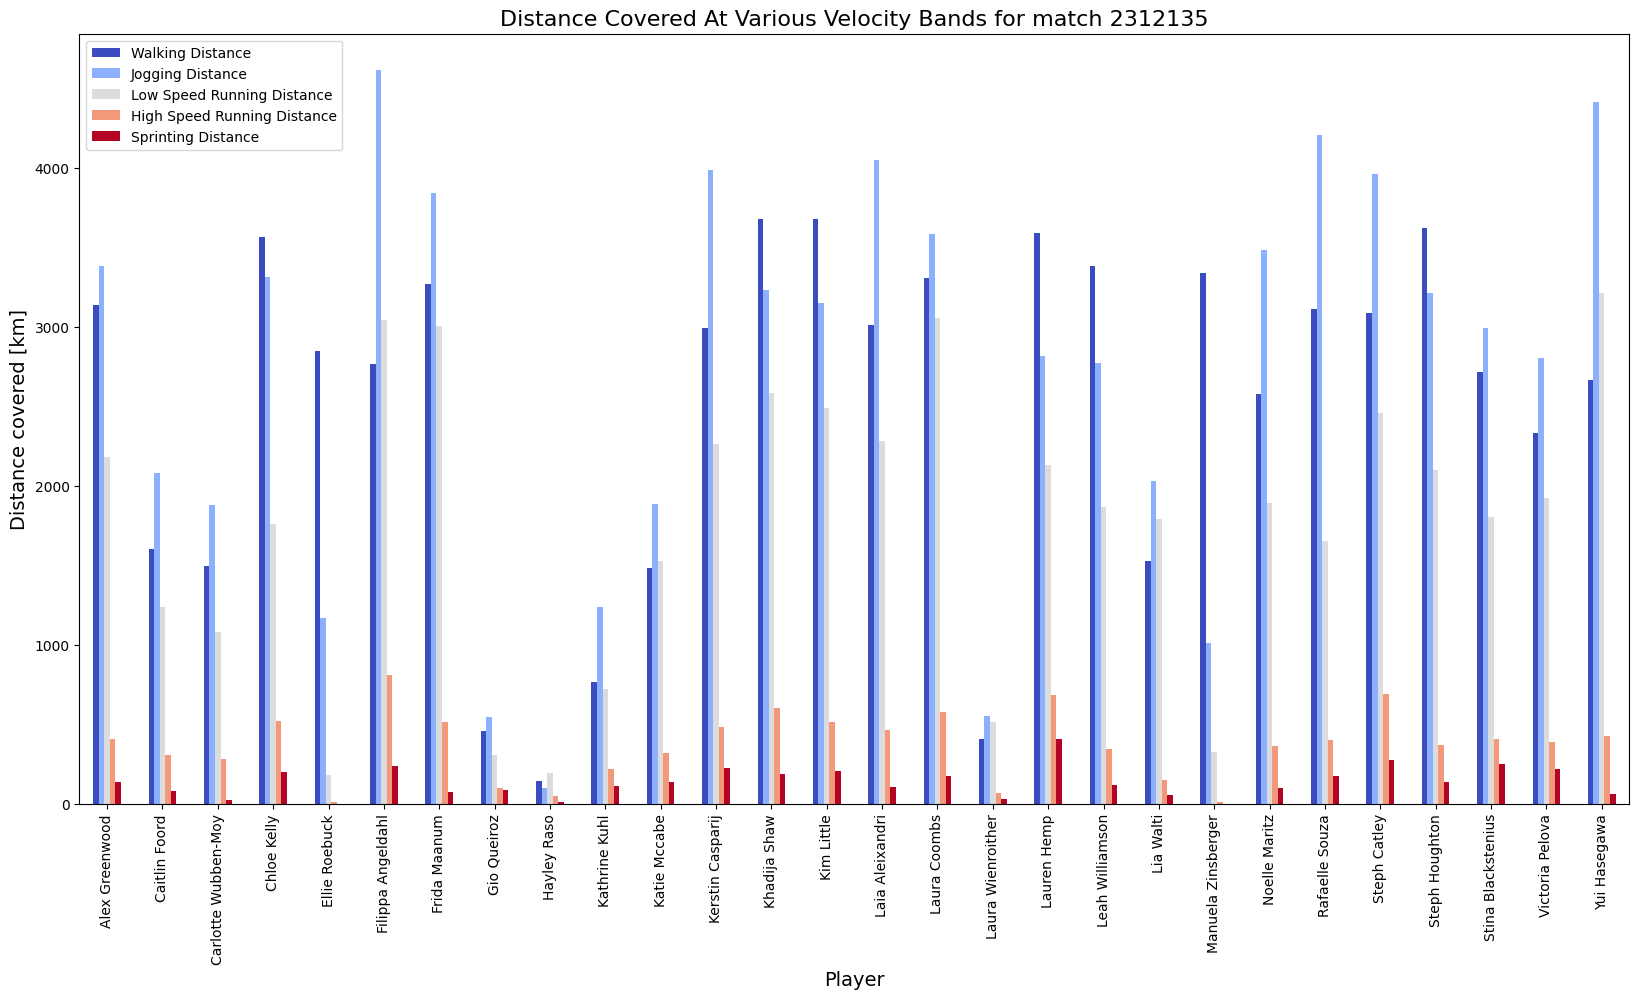

In [165]:


home_summary = df.loc[df['game_opta_id'] == 2312135]

home_summary = home_summary.groupby(['player_name']).agg({
    'Walking Distance': "sum", 
    'Jogging Distance': "sum",
    'Low Speed Running Distance': 'sum',
    'High Speed Running Distance': 'sum',
    'Sprinting Distance': 'sum',
    })


ax = home_summary[['Walking Distance','Jogging Distance','Low Speed Running Distance','High Speed Running Distance','Sprinting Distance']].plot.bar(
    colormap='coolwarm', figsize=(20, 10))
ax.set_xlabel('Player', fontsize = 14)
ax.set_ylabel('Distance covered [km]', fontsize = 14)
ax.set_title(f"Distance Covered At Various Velocity Bands for match {2312135}", fontsize = 16)
plt.show()

# Speed information section

In [2]:
player_info_path = "../final_data/player.csv"
df_player_info = pd.read_csv(player_info_path)
df_player_info.head()

,name,ssiId,teamSsiId,optaId,optaUuid
0,M. Zinsberger,d588cf67-0e75-4619-a541-d0945138b3fb,a11d34f3-da66-4219-9332-85421e44692f,174571.0,dib5a7vebmtxqcksi1tuteklx
1,Rafaelle Souza,f3a6c7a6-4686-4c77-8e87-5bd842ec1642,a11d34f3-da66-4219-9332-85421e44692f,97362.0,bilgoekg6gqwr3qbp6dp0j1zp
2,C. Wubben-Moy,2b4f2f32-87cb-4cc7-bf6c-211f5ad1242a,a11d34f3-da66-4219-9332-85421e44692f,186025.0,bd1752qgxbodnsgdus42fc99l
3,L. Williamson,5551eb44-290b-426d-9311-8154e778d407,a11d34f3-da66-4219-9332-85421e44692f,174345.0,6zaowm8oua2nzpobekogff1lh
4,S. Catley,8b2decb4-3722-4313-b0a0-d0a48e39aeb2,a11d34f3-da66-4219-9332-85421e44692f,165678.0,e3fa1ou90dirp8yjjterhrs9h


In [3]:
player_tracking_path = "../final_data/tracking_player.csv"
df_player_tracking = pd.read_csv(player_tracking_path)
df_player_tracking.head() # 35 secs

,game_id,period,time,wallclock,live,possession,player_id,player_name,loc_x,loc_y,loc_z,spd,dist,opta_id
0,2312135,1,0.0,1676118667880,False,home,0746befc-a701-4b33-8faf-b3cccccf17bb,25,-11.08,1.55,0.0,0.0,0.0,192194
1,2312135,1,0.0,1676118667880,False,home,08d71d20-85ad-4d98-8bc0-36b8e39e517a,9,-0.15,-30.50,0.0,0.0,0.0,174349
2,2312135,1,0.0,1676118667880,False,home,092fcb72-e828-4d76-b7b9-abdf8c0d07ad,12,11.04,-4.63,0.0,0.0,0.0,226718
3,2312135,1,0.0,1676118667880,False,home,16bae841-2083-41fa-a659-031ee07d867d,25,-0.16,9.02,0.0,0.0,0.0,191720
4,2312135,1,0.0,1676118667880,False,home,1ab5dc11-1e32-4e6b-a385-5b736ec14763,7,-2.71,8.54,0.0,0.0,0.0,96385


## Calculate speed for particular player for particular game

In [8]:
game_id = 2312135
player_name = "K. Casparij"
player_id = df_player_info[df_player_info["name"] == player_name]['ssiId'].tolist()[0]
player_id

'8c34093f-843c-41a4-b02d-1ed289de00a3'

In [26]:
info_per_player_per_match = df_player_tracking[(df_player_tracking["game_id"]==game_id) & 
                                               (df_player_tracking["player_id"]==player_id) & 
                                               (df_player_tracking["period"]==1)]
info_per_player_per_match.head()

,game_id,period,time,wallclock,live,possession,player_id,player_name,loc_x,loc_y,loc_z,spd,dist,opta_id
12,2312135,1,0.00,1676118667880,False,home,8c34093f-843c-41a4-b02d-1ed289de00a3,2,-12.99,-23.00,0.0,0.00,0.00,447080
34,2312135,1,0.04,1676118667920,True,home,8c34093f-843c-41a4-b02d-1ed289de00a3,2,-13.00,-23.03,0.0,0.00,0.03,447080
56,2312135,1,0.08,1676118667960,True,home,8c34093f-843c-41a4-b02d-1ed289de00a3,2,-13.00,-23.05,0.0,0.56,0.02,447080
78,2312135,1,0.12,1676118668000,True,home,8c34093f-843c-41a4-b02d-1ed289de00a3,2,-13.01,-23.07,0.0,0.56,0.02,447080
100,2312135,1,0.16,1676118668040,True,home,8c34093f-843c-41a4-b02d-1ed289de00a3,2,-13.01,-23.09,0.0,0.60,0.02,447080


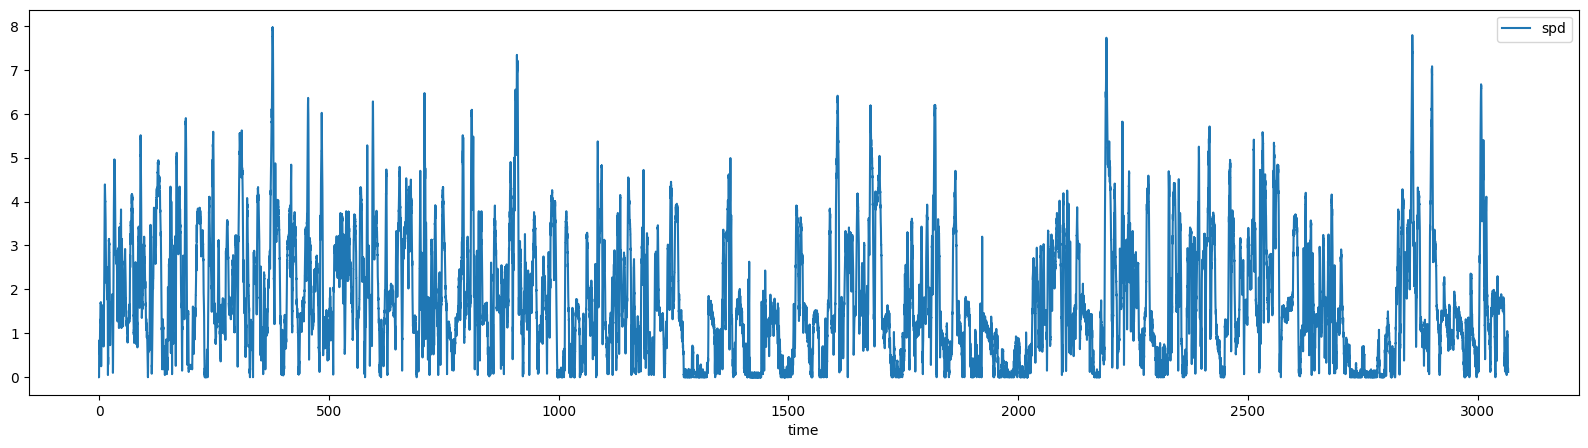

In [28]:
import matplotlib.pyplot as plt


# plt.figure(figsize=(20,10))
info_per_player_per_match.plot(x="time", y="spd",figsize=(20,5))
plt.show()

In [ ]:
# import numpy as np

# maxacc = 6
# home_acc_dict = {}


# dt = info_per_player_per_match['time'].diff()
# # info_per_player_per_match["spd"].diff() / dt


# info_per_player_per_match['Acc'] = info_per_player_per_match["spd"].diff() / dt
# info_per_player_per_match['dist'] = info_per_player_per_match["spd"].sum() / 25. / 1000

# #set acceleration condition
# info_per_player_per_match['Acc'].loc[np.absolute(info_per_player_per_match['Acc']) > maxacc] = np.nan
# ##check if acceleration was high or low
# info_per_player_per_match['Acc_type'] = np.where(np.absolute(info_per_player_per_match['Acc']) >= 2,
#                                                             "High", "Low")
# info_per_player_per_match['Acc_g'] = info_per_player_per_match['Acc_type'].ne(
#     info_per_player_per_match['Acc_type'].shift()).cumsum()
# print(info_per_player_per_match["dist"].unique())

# for g in np.unique(info_per_player_per_match['Acc_g']):
#         acc_temp = info_per_player_per_match[info_per_player_per_match['Acc_g'] == g]
#         if acc_temp['Acc_type'].iloc[0] == 'High':
#             #get the acceleration period
#             acc_duration = round(max(acc_temp['time']) - min(acc_temp['time']), 2)
#             #check if it was acceleration or deceleration
#             acc_or_dec = np.where(np.mean(acc_temp['Acc']) > 0, "Acc", "Dec")
#             #create a dictionary
#             home_acc_dict[len(home_acc_dict) + 1] = {'Player': player_name, 'Group': g, 'Duration': acc_duration,
#                                                      'Type': acc_or_dec, 'dist' : info_per_player_per_match["dist"].unique() }
            

# home_acc_df = pd.DataFrame.from_dict(home_acc_dict,orient='index')
# #get accelerations that were longer than 0.75 sec
# home_acc_df1 = home_acc_df[home_acc_df['Duration']>=.75]
# home_acc_df1.head()



# #calculate ratio for each player fo the home team
# accdec = []
# # for player in home_players:
# accs = home_acc_df1[(home_acc_df1['Player']==player_name) & (home_acc_df1['Type']=='Acc')].count()[0]
# decs = home_acc_df1[(home_acc_df1['Player']==player_name) & (home_acc_df1['Type']=='Dec')].count()[0]
# ac_ratio = accs / decs
# accdec.append(ac_ratio)
# #saving it in a dataframe
# print(accdec)
# home_summary = pd.DataFrame({"Distance [km]" : [9]})


# home_summary['AccDec'] = accdec

# #making a plot
# fig, ax = plt.subplots(figsize=(12, 8))
# ax.scatter(home_summary['Distance [km]'], home_summary['AccDec'], color = "red", s = 50)
# for i in home_summary.index:
#     ax.annotate(str("test"), (home_summary[home_summary.index==i]['Distance [km]']+ 0.1, home_summary[home_summary.index==i]['AccDec'] + 0.005), fontsize = 10)
# ax.set_xlabel("Distance [km]")
# ax.set_ylabel("AccDec Ratio")
# plt.grid()
# plt.title("Acceleration - Deceleration Ratio")
# plt.show()

## Calculating acceleration/deceleration ratio graph

In [4]:
game_id = 2312135

all_players_in_match = df_player_tracking[(df_player_tracking["game_id"]==game_id) & (df_player_tracking["possession"]=="home")
                   & (df_player_tracking["live"]==True)]["player_id"].unique()

home_summary = pd.DataFrame(columns=['player_name', 'Distance [km]'])
maxacc = 6
home_acc_dict = {}


for index, player in enumerate(all_players_in_match):
    print(index)
    print(player)
    p_name = df_player_info[df_player_info["ssiId"] == player]['name'].tolist()[0]
    # print(p_name)
    player_id = df_player_info[df_player_info["name"] == p_name]['ssiId'].tolist()[0]
    info_per_player_per_match = df_player_tracking[(df_player_tracking["game_id"]==game_id) & 
                                                (df_player_tracking["player_id"]==player_id)]
    # print(info_per_player_per_match.head())
    dt = info_per_player_per_match['time'].diff()
    # info_per_player_per_match["spd"].diff() / dt


    info_per_player_per_match['Acc'] = info_per_player_per_match["spd"].diff() / dt
    info_per_player_per_match['dist'] = info_per_player_per_match["spd"].sum() / 25. / 1000
    
    #set acceleration condition
    info_per_player_per_match['Acc'].loc[np.absolute(info_per_player_per_match['Acc']) > maxacc] = np.nan
    ##check if acceleration was high or low
    info_per_player_per_match['Acc_type'] = np.where(np.absolute(info_per_player_per_match['Acc']) >= 2,
                                                                "High", "Low")
    info_per_player_per_match['Acc_g'] = info_per_player_per_match['Acc_type'].ne(
        info_per_player_per_match['Acc_type'].shift()).cumsum()

    for g in np.unique(info_per_player_per_match['Acc_g']):
            acc_temp = info_per_player_per_match[info_per_player_per_match['Acc_g'] == g]
            if acc_temp['Acc_type'].iloc[0] == 'High':
                #get the acceleration period
                acc_duration = round(max(acc_temp['time']) - min(acc_temp['time']), 2)
                #check if it was acceleration or deceleration
                acc_or_dec = np.where(np.mean(acc_temp['Acc']) > 0, "Acc", "Dec")
                #create a dictionary
                home_acc_dict[len(home_acc_dict) + 1] = {'Player': p_name, 'Group': g, 'Duration': acc_duration,
                                                        'Type': acc_or_dec, 'dist' : info_per_player_per_match["dist"].unique()[0]}



            

home_acc_df = pd.DataFrame.from_dict(home_acc_dict,orient='index')
#get accelerations that were longer than 0.75 sec
home_acc_df1 = home_acc_df[home_acc_df['Duration']>=.75]
home_acc_df1.head()


0
0746befc-a701-4b33-8faf-b3cccccf17bb
1
08d71d20-85ad-4d98-8bc0-36b8e39e517a
2
092fcb72-e828-4d76-b7b9-abdf8c0d07ad
3
16bae841-2083-41fa-a659-031ee07d867d
4
1ab5dc11-1e32-4e6b-a385-5b736ec14763
5
2b4f2f32-87cb-4cc7-bf6c-211f5ad1242a
6
3706abe8-9aba-49c6-8a8f-4f4ef2a9be70
7
471aedfa-df6f-44b4-b008-7b2cef31f3cb
8
5551eb44-290b-426d-9311-8154e778d407
9
5ee28902-a961-4cbc-855e-84e4af865a70
10
724f3280-015e-440e-b9b7-0598833e9c2d
11
8b2decb4-3722-4313-b0a0-d0a48e39aeb2
12
8c34093f-843c-41a4-b02d-1ed289de00a3
13
a5ec6d76-4788-4894-bea2-0a165d4a36ba
14
a63bc99a-6a68-4934-9a17-d4117c810085
15
aa53177e-f36d-4298-9c67-3c93a49c3325
16
c7598a8f-b910-46a7-8ee3-c052c228ceff
17
d588cf67-0e75-4619-a541-d0945138b3fb
18
db47bb9a-634f-4ef6-9cd0-d6daf74164d7
19
e8b086da-181d-4404-9e80-bf4b0035e2ec
20
eb23d9b0-cf56-4eb2-9a72-0022f70e3125
21
f3a6c7a6-4686-4c77-8e87-5bd842ec1642
22
8446653e-8da9-44b1-9b01-2cc7fd19481b
23
dc64b316-4b36-4467-838c-96bcbc242748
24
bea130d3-e02f-4d51-b301-2ef18a880a95
25
2c5def6

,Player,Group,Duration,Type,dist
168,Y. Hasegawa,336,0.76,Dec,11.21657
2139,Y. Hasegawa,4278,0.88,Dec,11.21657
2151,Y. Hasegawa,4302,0.80,Acc,11.21657
2617,Y. Hasegawa,5234,0.96,Dec,11.21657
3596,Y. Hasegawa,7192,0.92,Dec,11.21657


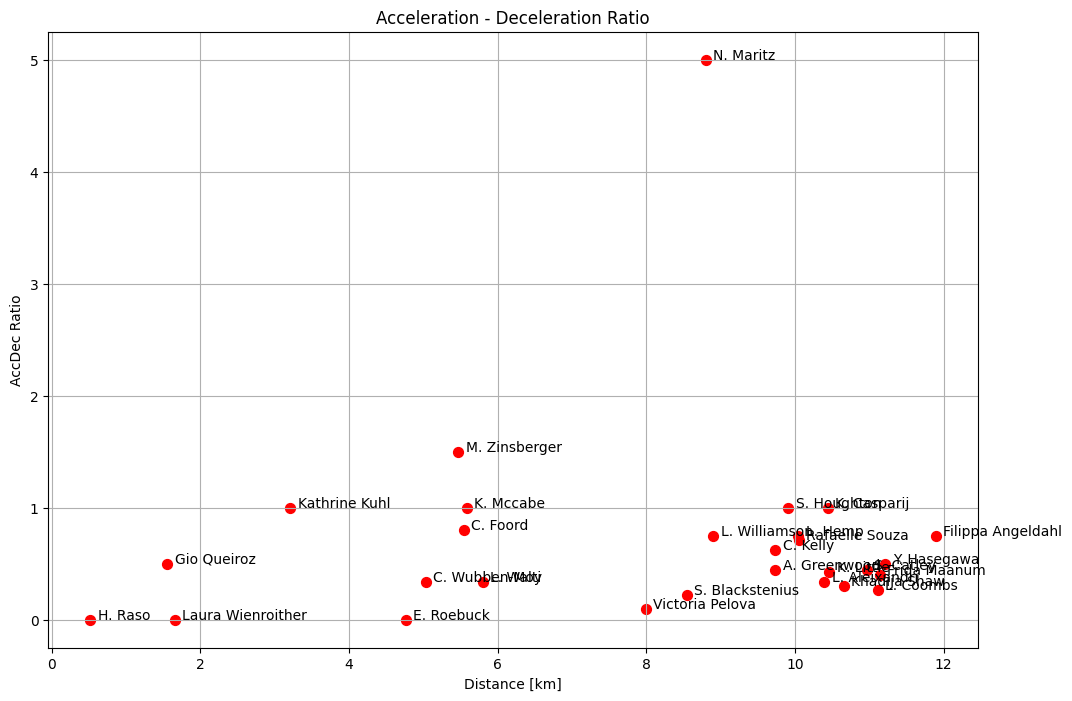

In [5]:
import matplotlib.pyplot as plt

accdec = []
home_summary = pd.DataFrame(columns=['player_name', 'Distance [km]','AccDec'])
for player in all_players_in_match:
    p_name = df_player_info[df_player_info["ssiId"] == player]['name'].tolist()[0]
    accs = home_acc_df1[(home_acc_df1['Player']==p_name) & (home_acc_df1['Type']=='Acc')].count()[0]
    decs = home_acc_df1[(home_acc_df1['Player']==p_name) & (home_acc_df1['Type']=='Dec')].count()[0]
    ac_ratio = accs / decs
    dist = home_acc_df1[(home_acc_df1['Player']==p_name)]['dist'].unique()[0]
    accdec.append(ac_ratio)
    home_summary = home_summary.append({'player_name':p_name, 'Distance [km]':dist, 'AccDec': ac_ratio}, ignore_index=True)
#saving it in a dataframe
#making a plot

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(home_summary['Distance [km]'], home_summary['AccDec'], color = "red", s = 50)
for i in home_summary.index:
    ax.annotate(home_summary[home_summary.index==i]['player_name'][i], (home_summary[home_summary.index==i]['Distance [km]']+ 0.1, home_summary[home_summary.index==i]['AccDec'] + 0.005), fontsize = 10)
ax.set_xlabel("Distance [km]")
ax.set_ylabel("AccDec Ratio")
plt.grid()
plt.title("Acceleration - Deceleration Ratio")
plt.show()

6662
[0, 0, 5.6925145035932205, 0, 17.02132726472466, 2.5251814443923535, 24.487835464293436, 5.364925601146194, 0, 10.782568753007865, 11.741852121034334, 13.755839046286136, 7.260652178334984, 7.260652178334984, 14.81125997716241, 11.741852121034292, 11.741852121034334, 11.741852121034334, 0, 10.782568753007865, 12.732837880392063, 7.260652178334984, 0, 4.9592361224235155, 2.2803260347733785, 2.961802162740888, 3.1964891291261917, 10.782568753007865, 7.260652178335022, 21.8545851603382, 4.9592361224235155, 6.460017522992052, 0, 2.148378972253692, 1.7601684158292177, 1.7601684158292177, 14.811259977162363, 24.487835464616648, 18.177085011789192, 19.367459369791696, 9.85478708037611, 8.95844253855203, 7.260652178334984, 2.7962790553008436, 0, 1.7601684158292177, 1.971770108703352, 1.7601684158292177, 2.796279055293515, 0, 0, 7.260652178334984, 9.85478708037611, 14.811259977162363, 5.6925145035932365, 5.692514503593171, 4.261631014392408, 9.85478708037603, 13.755839046286136, 5.69251450

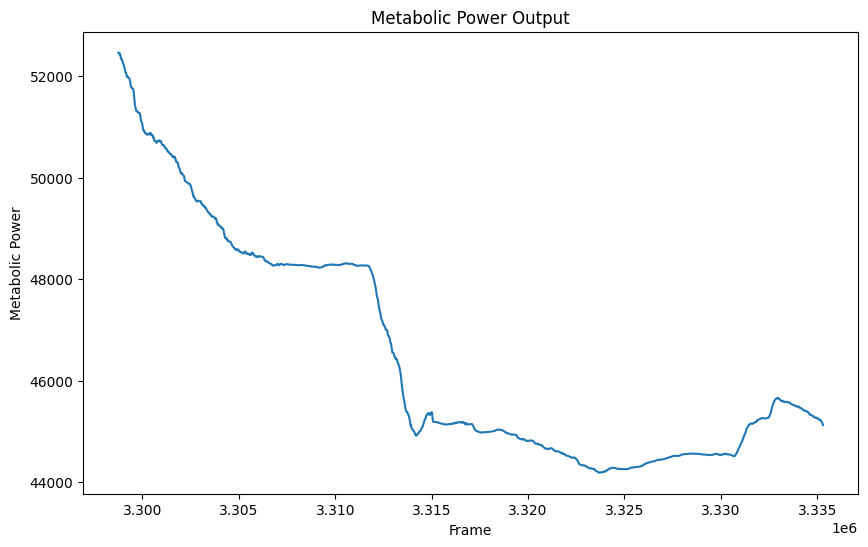

In [46]:
def split_at(s, c, n):
    words = s.split(c)
    return c.join(words[:n]), c.join(words[n:])

#function to calculate metabolic cost
def metabolic_cost(acc): #https://jeb.biologists.org/content/221/15/jeb182303
    if acc > 0:
        cost = 0.102 * ((acc ** 2 + 96.2) ** 0.5) * (4.03 * acc + 3.6 * np.exp(-0.408 * acc))
    elif acc < 0:
        cost = 0.102 * ((acc ** 2 + 96.2) ** 0.5) * (-0.85 * acc + 3.6 * np.exp(1.33 * acc))
    else:
        cost = 0
    return cost

team = info_per_player_per_match

playerids = all_players_in_match
# playerids = np.unique(list(map(lambda x: split_at(x, '_', 2)[0], playerids)))

fig, ax = plt.subplots(figsize = (10, 6))
player = 'Home_6'
#calculate metabolic cost
mc_temp = list(map(lambda x: metabolic_cost(info_per_player_per_match[info_per_player_per_match["player_id"] == "87dbfea7-b4c1-49ce-b210-6210f5efae55"]["Acc"].tolist()[x]), range(0, len(info_per_player_per_match[info_per_player_per_match["player_id"] == "87dbfea7-b4c1-49ce-b210-6210f5efae55"]["Acc"]))))
print(len(mc_temp))
print(mc_temp)

#multiply it by speed
mp_temp = mc_temp * info_per_player_per_match[info_per_player_per_match["player_id"] == "87dbfea7-b4c1-49ce-b210-6210f5efae55"]["spd"]
#calculate rolling average
print(len(mp_temp))
print(mp_temp)
test_mp = mp_temp.rolling(5000,min_periods=1).apply(lambda x : np.nansum(x)) #Use Changepoint Detection Here
ax.plot(test_mp[5000:])
ax.set_title('Metabolic Power Output')
ax.set_ylabel("Metabolic Power")
ax.set_xlabel("Frame")
plt.show()

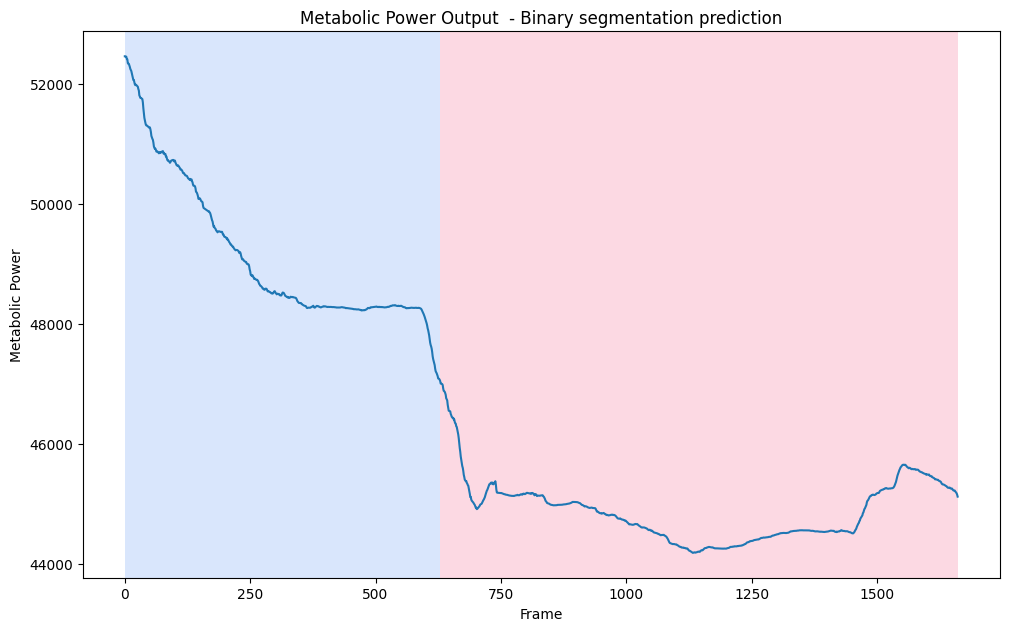

In [43]:
import ruptures as rpt
signal = np.array(test_mp[5000:len(test_mp)]).reshape((len(test_mp[5000:len(test_mp)]),1))
algo = rpt.Binseg(model="l2").fit(signal)  ##potentially finding spot where substitution should happen
result = algo.predict(n_bkps=1)  # big_seg
rpt.show.display(signal, result, figsize=(10, 6))
plt.title('Metabolic Power Output  - Binary segmentation prediction')
plt.ylabel("Metabolic Power")
plt.xlabel("Frame")
plt.show()